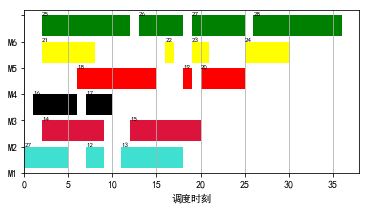

In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号  

height=16 # 柱体高度，设为2的整数倍，方便Y轴label居中，如果设的过大，柱体间的间距就看不到了，需要修改下面间隔为更大的值
interval=4 # 柱体间的间隔
colors = ("turquoise","crimson","black","red","yellow","green","brown","blue") # 颜色，不够再加
x_label=u"调度时刻" # 设置x轴label

#df = pd.read_csv(io.StringIO(data), header=None, names=["Machine", "Start", "Finish","Title"] )
df = pd.read_csv('data.csv', header=None, names=["Machine", "Start", "Finish","Title"])
df["Diff"] = df.Finish - df.Start
fig,ax=plt.subplots(figsize=(6,3))
labels=[]
count=0;
for i,machine in enumerate(df.groupby("Machine")):
    labels.append(machine[0])
    data=machine[1]
    for index,row in data.iterrows():
        ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors=colors[i])
        plt.text(row["Start"], (height+interval)*(i+1),row['Title'],fontsize='x-small')  
        if(row["Finish"]>count):
            count=row["Finish"]
ax.set_ylim(0, (height+interval)*len(labels)+interval)
ax.set_xlim(0, count+2)
ax.set_xlabel(x_label)
#ax.set_yticks(range(interval+height/2,(height+interval)*len(labels),(height+interval)))
ax.set_yticklabels(labels)
#ax.grid(True) # 显示网格
ax.xaxis.grid(True) # 只显示x轴网格
#ax.yaxis.grid(True) # 只显示y轴网格
plt.savefig('gantt.png',dpi=800)
plt.show()
